In [1]:
#from scSHARP.sc_sharp import *
from scSHARP.sc_sharp import scSHARP

In [2]:
data_path = "simulations/splat_0.7/query_counts.csv.gz"
#tool_preds = "simulations/splat_0.7/preds.csv"
# tool_preds = "/users/daniel/desktop/preds_test.csv"
tool_preds = None
tool_list = ["scina", "scsorter", "sctype", "scpred", "singler"]
marker_path = "/Users/maxperozek/CP499/scSHARP_tool/simulations/splat_0.7/markers.txt"
neighbors=2

config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [3]:
out_path = "/users/daniel/desktop/preds_test.csv"
ref_path = "simulations/splat_0.7/ref_counts.csv.gz"
ref_label_path = "simulations/splat_0.7/ref_labels.csv"
sharp.run_tools(out_path, ref_path, ref_label_path)

Rscript /Users/maxperozek/CP499/scSHARP_tool/scSHARP/rdriver.r
[1] "/users/daniel/desktop/preds_test.csv"
[1] "scina"    "scsorter" "sctype"   "scpred"   "singler" 
$Group1
[1] "Gene22998" "Gene25191" "Gene4979"  "Gene2147"  "Gene23184"

$Group2
[1] "Gene13063" "Gene24725" "Gene17485" "Gene18913" "Gene11715"

$Group3
[1] "Gene32542" "Gene6733"  "Gene18063" "Gene15008" "Gene2937" 

$Group4
[1] "Gene8214"  "Gene7177"  "Gene16718" "Gene26931" "Gene15204"

[1] "Group1" "Group2" "Group3" "Group4"
[1] "simulations/splat_0.7/ref_counts.csv.gz"
[1]  1000 33694
[1] 33694  1000


Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Centering and scaling data matrix
  |======================================================================| 100%
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
PC_ 1 
Positive:  Gene32542, Gene6733, Gene12892, Gene2420, Gene15204, Gene20190, Gene8214, Gene20408, Gene26174, Gene17872 
	   Gene26682, Gene7794, Gene19284, Gene30714, Gene19548, Gene31325, Gene13977, Gene24561, Gene7646, Gene18942 
	   Gene25088, Gene4473, Gene10253, Gene29556, Gene

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1000
Number of edges: 41265

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6546
Number of communities: 4
Elapsed time: 0 seconds
[1] "Running SCINA"
[1] "Running scSorter"
[1] "Running scType"


Performing log-normalization
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating gene variances
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Calculating feature variances of standardized and clipped values
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Centering and scaling data matrix
  |======================================================================| 100%
PC_ 1 
Positive:  Gene28271, Gene14662, Gene19473, Gene4979, Gene18913, Gene22998, Gene23350, Gene2519, Gene11715, Gene22174 
	   Gene8601, Gene28909, Gene2343, Gene15151, Gene28661, Gene10673, Gene639, Gene8551, Gene21693, Gene3941 
	   Gene18213, Gene18986, Gene22195, Gene4841, Gene147

●  Extracting feature space for each cell type...
DONE!
●  Training models for each cell type...


Loading required package: ggplot2
Loading required package: lattice


DONE!
●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 2000 features shared between reference and new dataset
	 ─ 100% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 2/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 3/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 4/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 5/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
Harmony 6/20
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
********************

●  Classifying cells...
DONE!


*************************************************|
Error in file(file, ifelse(append, "a", "w")) : 
  cannot open the connection
Calls: run_r4scsharp ... write.csv -> eval.parent -> eval -> eval -> <Anonymous> -> file
In addition: Warning messages:
1: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
  pseudoinverse used at -2.699
2: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
  neighborhood radius 0.30103
3: In simpleLoess(y, x, w, span, degree = degree, parametric = parametric,  :
  reciprocal condition number  2.0083e-14
4: In file(file, ifelse(append, "a", "w")) :
  cannot open file '/users/daniel/desktop/preds_test.csv': No such file or directory
Execution halted


True

In [4]:
sharp.component_correlation()

Exception: Prediction Dataframe not Found at /users/daniel/desktop/preds_test.csv

In [9]:
preds, train_nodes, test_nodes, keep_cells, conf_scores = sharp.run_prediction(training_epochs=30, thresh=0.51, batch_size=20, seed=8)
print(preds[0:10])
print(conf_scores[0:10])

Exception: Prediction Dataframe not Found at /users/daniel/desktop/preds_test.csv

In [6]:
sharp.save_model("/Users/daniel/Desktop/example_model")

In [4]:
sharp.load_model("/Users/daniel/Desktop/example_model")

In [7]:
int_df = sharp.run_interpretation()
sharp.heat_map(int_df, n=5)

AttributeError: 'scSHARP' object has no attribute 'model_trained'

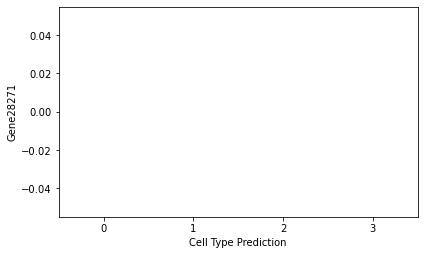

In [4]:
sharp.expression_plots(genes=['Gene28271'])